In [1]:
# %matplotlib ipympl 
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/Kinect_V2_skeleton_DataSet/AfterMariage/After_marriage_Data_and_separate_to_train_and_test/TestDataForPoint.csv", sep=";")
df = df.rename({"Gool": "label"}, axis=1)

In [ ]:
df.label.value_counts()

In [17]:
def row_to_points(row: pd.Series):
    return np.split(row.values[0:-1], 15)

def row_to_points_for_ploting(row: pd.Series):
    row_no_label = row.values[0:-1]
    xs = row_no_label[0::3]
    ys = row_no_label[1::3]
    zs = row_no_label[2::3]
    return xs, ys, zs

In [ ]:
%matplotlib inline

In [ ]:
xs, ys, zs = row_to_points_for_ploting(df[df.label == 5].iloc[0])

# plt.style.use('dark_background')
# ax = plt.axes(projection="3d")
# ax.scatter3D(xs, ys, zs, color="red")
# ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs))) 
# plt.show()

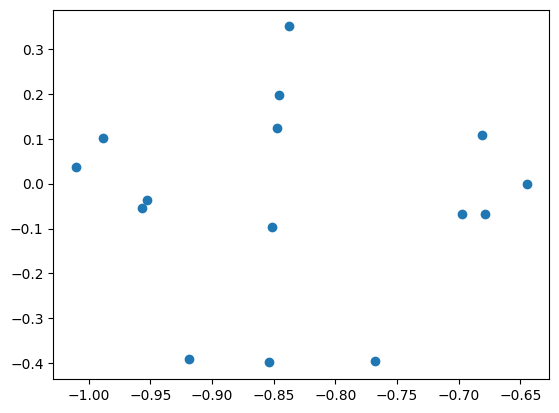

In [16]:
xs, ys, zs = row_to_points_for_ploting(df[df.label == 8].iloc[50])
plt.scatter(xs, ys)
plt.show()

In [ ]:
xs, ys, zs = row_to_points_for_ploting(df[df.label == 3].iloc[50])
plt.scatter(xs, ys)
plt.show()

In [ ]:
def norm_data_point(value_to_norm, value_min, value_max):
    return (value_to_norm - value_min) / (value_max - value_min)

In [3]:
flat = df.copy(deep=True)

In [4]:
flat = flat.drop([col for col in flat.columns if col[-1] == 'Z'], axis=1)

In [5]:
flat

,HeadX,HeadY,NeckX,NeckY,SpineShoulderX,SpineShoulderY,SpineMidX,SpineMidY,SpineBaseX,SpineBaseY,...,WristLeftY,HandRightX,HandRightY,HandLeftX,HandLeftY,HipRightX,HipRightY,HipLeftX,HipLeftY,label
0,-0.494363,0.311212,-0.462087,0.197373,-0.466921,0.120883,-0.473392,-0.105025,-0.474454,-0.404593,...,0.576632,-0.278589,0.654104,-0.670764,0.630485,-0.388247,-0.398212,-0.551688,-0.403626,1
1,-0.236401,0.149797,-0.224859,0.022655,-0.224238,-0.045989,-0.222619,-0.251172,-0.216334,-0.525767,...,0.522436,-0.046529,0.121896,-0.307118,0.587754,-0.134776,-0.522876,-0.291507,-0.514388,1
2,-0.521029,0.169792,-0.511208,0.035362,-0.511873,-0.023628,-0.511041,-0.203619,-0.506590,-0.443494,...,0.428036,-0.311247,0.500917,-0.684741,0.469221,-0.424332,-0.439388,-0.579216,-0.438062,1
3,-0.542952,0.143099,-0.528909,0.018062,-0.531003,-0.055283,-0.535312,-0.277963,-0.539446,-0.579363,...,0.366105,-0.257991,0.401278,-0.785772,0.379841,-0.462652,-0.570891,-0.602532,-0.572875,1
4,-0.209246,0.403439,-0.209372,0.255252,-0.208967,0.179072,-0.206858,-0.053092,-0.203771,-0.368433,...,0.484866,0.169175,0.567565,-0.617353,0.573551,-0.115145,-0.364610,-0.287413,-0.362962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,-0.200126,0.390285,-0.199028,0.267840,-0.200143,0.192029,-0.202751,-0.040531,-0.205290,-0.358044,...,0.079245,-0.239293,0.082029,-0.214173,0.080405,-0.131023,-0.352201,-0.272653,-0.352102,8
8396,-0.599630,0.346020,-0.588970,0.205539,-0.591406,0.134917,-0.596742,-0.080723,-0.602677,-0.374395,...,0.029834,-0.510565,0.009985,-0.737966,0.027240,-0.513729,-0.369594,-0.674621,-0.368753,8
8397,-0.644507,0.353417,-0.640407,0.191524,-0.642423,0.122398,-0.646437,-0.088182,-0.650627,-0.377005,...,0.094014,-0.451421,0.159055,-0.760851,0.080546,-0.567104,-0.370818,-0.714169,-0.371533,8
8398,-0.283310,0.408355,-0.273319,0.270170,-0.274711,0.194538,-0.278142,-0.035887,-0.281755,-0.349262,...,-0.040089,-0.188687,-0.078280,-0.456035,-0.057972,-0.195982,-0.344269,-0.361322,-0.346402,8


In [ ]:
### normalization for all figures.

# def min_max_for_columns(df, axis_letter, marigin_perc = 0.1):
#     return ((1.0 - marigin_perc) * min([df[col].min() for col in df.columns if col[-1] == axis_letter.upper()]),
#             (1.0 + marigin_perc) * max([df[col].max() for col in df.columns if col[-1] == axis_letter.upper()]))

# min_x, max_x = min_max_for_columns(flat, 'X')
# min_y, max_y = min_max_for_columns(flat, 'Y')

In [ ]:
flat['HeadX_norm'] = flat.HeadX.apply(norm_data_point, args=(min_x, max_x))

In [ ]:
flat = flat.drop('HeadX_norm', axis=1)

In [13]:
def raw_points_for_plotting(row: pd.Series):

    raw_cols = list(row.index)
    raw_cols.remove('label')

    rxs = [row[col] for col in raw_cols if col[-1] == 'X']
    rys = [row[col] for col in raw_cols if col[-1] == 'Y']

    return {'raw_points_xs': rxs, 'raw_points_ys': rys}

In [48]:
def show_me_raw_people(pose=1, case=0, legend_loc='upper left', path_to_image="", data_row=None):
    if data_row is None:
        xy = raw_points_for_plotting(flat[flat.label == pose].iloc[case])
    else:
        xy = raw_points_for_plotting(data_row)

    plt.scatter(xy['raw_points_xs'], xy['raw_points_ys'], color='blue', label='joints')
    plt.grid(alpha=0.5)
    # leg = plt.legend(loc=legend_loc)
    # leg.get_frame().set_edgecolor('black')

    if data_row is None:
        plt.title(f"Example of non-normalized point coordinates:\n pose {pose}, case {case}")
    else:
        plt.title(f"Example of non-normalized point coordinates:\n pose {int(data_row.label)}, case {data_row.name}")    

    plt.xlabel("x position")
    plt.ylabel("y position")
    if path_to_image != "":
        plt.savefig(path_to_image, dpi=150)
    plt.show()


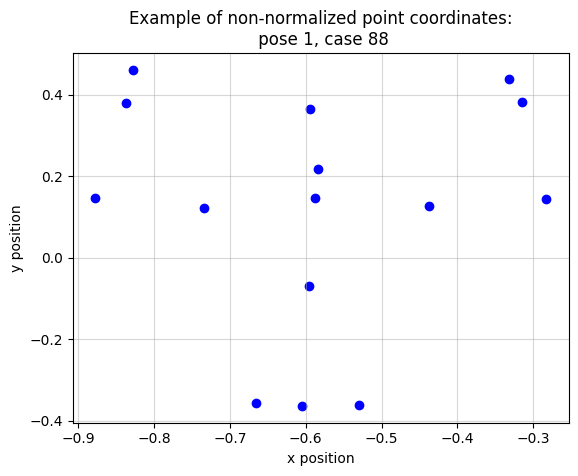

In [49]:
show_me_raw_people(pose=1, case=88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\raw_pose_1_case_88.jpg")

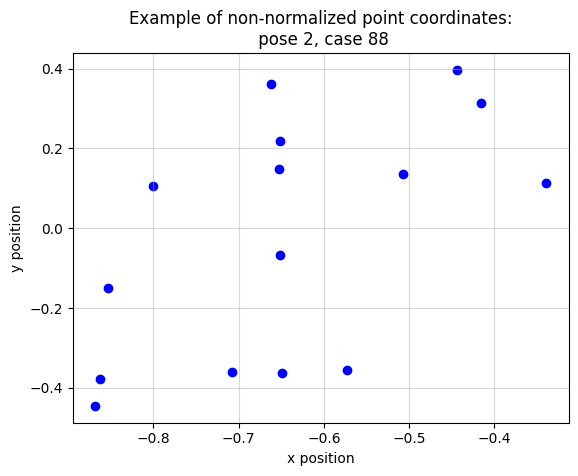

In [50]:
show_me_raw_people(pose=2, case=88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\raw_pose_2_case_88.jpg")

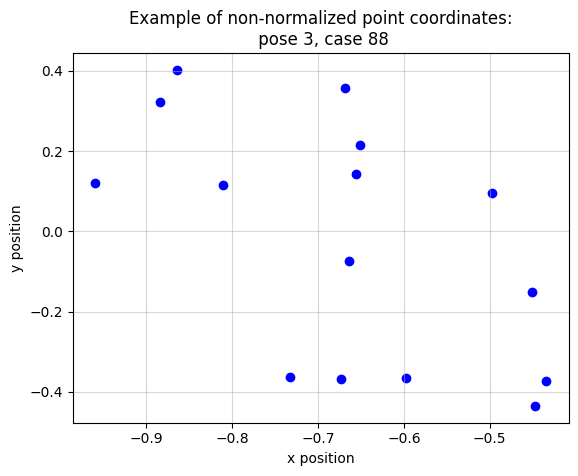

In [51]:
show_me_raw_people(pose=3, case=88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\raw_pose_3_case_88.jpg")

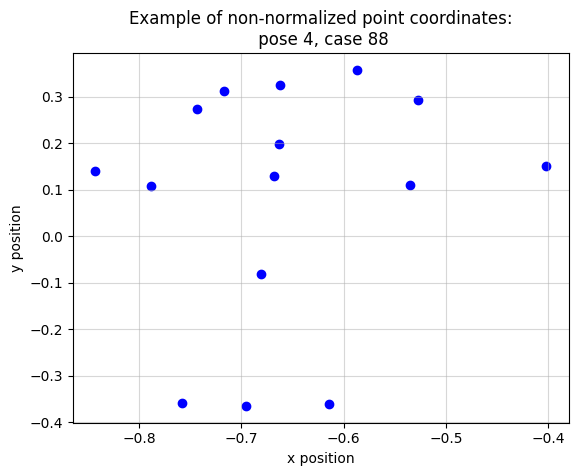

In [52]:
show_me_raw_people(pose=4, case=88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\raw_pose_4_case_88.jpg")

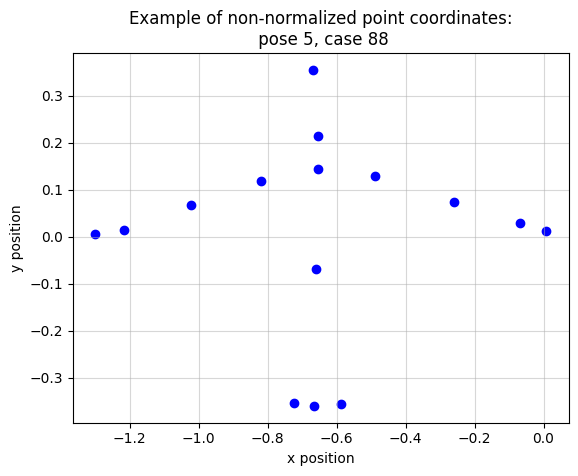

In [53]:
show_me_raw_people(pose=5, case=88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\raw_pose_5_case_88.jpg")

In [70]:
def difference_for_raw_points(row: pd.Series):

    headY_spineBaseY = row.HeadY - row.SpineBaseY
    hipRightX_hipLeftX = row.HipRightX - row.HipLeftX

    raw_columns_to_process = [flat.HeadY, flat.SpineBaseY, flat.HipRightX, flat.HipLeftX]
    for col in raw_columns_to_process:
        if col[-1] == 'X':
            hipRightX_hipLeftX
        else:
            headY_spineBaseY
    return {'dist HipRightX and HipLeftX': hipRightX_hipLeftX, 'dist HeadY and SpineBaseY': headY_spineBaseY}        

In [71]:
def calculate_diff_for_particular_case(pose=1, case=0, data_row=None):
    
    if data_row == None:
        x_to_x = difference_for_raw_points(flat[flat.label == pose].iloc[case])
        x_to_x['dist HipRightX and HipLeftX']
        y_to_y = difference_for_raw_points(flat[flat.label == pose].iloc[case])
        y_to_y['dist HeadY and SpineBaseY']
    else:    
        x_to_x = difference_for_raw_points(data_row)
        y_to_y = difference_for_raw_points(data_row)
    
    
    print(f"In pose {pose}, case {case} distance between HipRightX and HipLeftX is {x_to_x['dist HipRightX and HipLeftX']}") 
    print(f"In pose {pose}, case {case} distance between HeadY and SpineBaseY is {y_to_y['dist HeadY and SpineBaseY']}") 

In [72]:
calculate_diff_for_particular_case(pose=5, case=88)

KeyError: -1

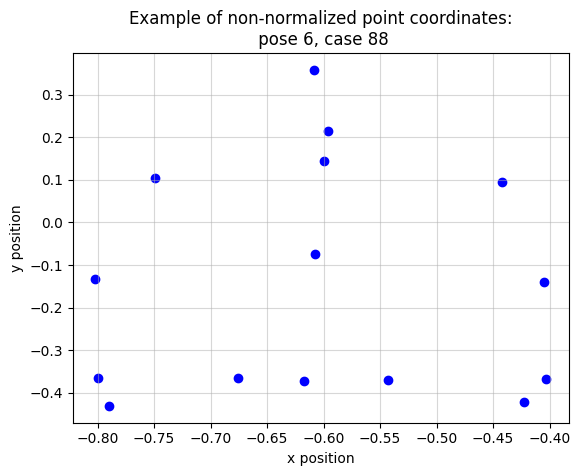

In [54]:
show_me_raw_people(pose=6, case=88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\raw_pose_6_case_88.jpg")

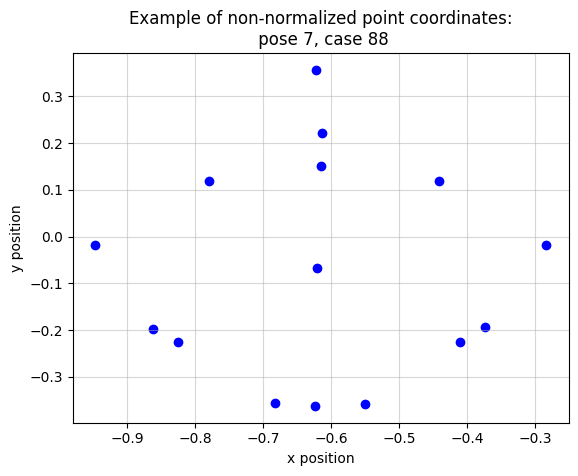

In [55]:
show_me_raw_people(pose=7, case=88, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\raw_pose_7_case_88.jpg")

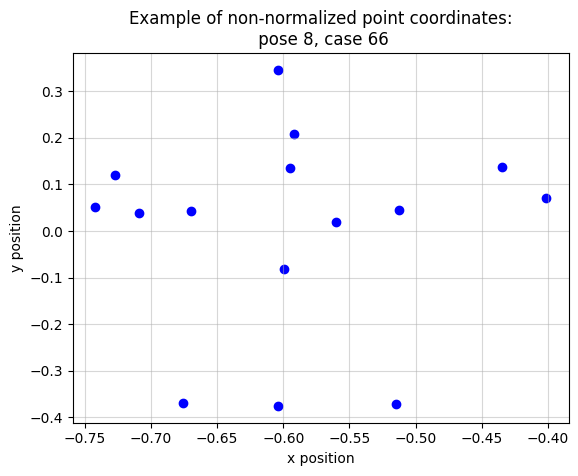

In [56]:
show_me_raw_people(pose=8, case=66, path_to_image=r"C:\Users\Hanna Wędrychowicz\Documents\wsei\Proseminarium\archive\illustrations\raw_pose_8_case_66.jpg")

In [ ]:
for col in flat.columns[0:-1]:
    if col[-1] == 'X':
        flat[col + '_norm'] = flat[col].apply(norm_data_point, args=(min_x, max_x))
    else:
        flat[col + '_norm'] = flat[col].apply(norm_data_point, args=(min_y, max_y))

In [12]:
flat

,HeadX,HeadY,NeckX,NeckY,SpineShoulderX,SpineShoulderY,SpineMidX,SpineMidY,SpineBaseX,SpineBaseY,...,WristLeftY,HandRightX,HandRightY,HandLeftX,HandLeftY,HipRightX,HipRightY,HipLeftX,HipLeftY,label
0,-0.494363,0.311212,-0.462087,0.197373,-0.466921,0.120883,-0.473392,-0.105025,-0.474454,-0.404593,...,0.576632,-0.278589,0.654104,-0.670764,0.630485,-0.388247,-0.398212,-0.551688,-0.403626,1
1,-0.236401,0.149797,-0.224859,0.022655,-0.224238,-0.045989,-0.222619,-0.251172,-0.216334,-0.525767,...,0.522436,-0.046529,0.121896,-0.307118,0.587754,-0.134776,-0.522876,-0.291507,-0.514388,1
2,-0.521029,0.169792,-0.511208,0.035362,-0.511873,-0.023628,-0.511041,-0.203619,-0.506590,-0.443494,...,0.428036,-0.311247,0.500917,-0.684741,0.469221,-0.424332,-0.439388,-0.579216,-0.438062,1
3,-0.542952,0.143099,-0.528909,0.018062,-0.531003,-0.055283,-0.535312,-0.277963,-0.539446,-0.579363,...,0.366105,-0.257991,0.401278,-0.785772,0.379841,-0.462652,-0.570891,-0.602532,-0.572875,1
4,-0.209246,0.403439,-0.209372,0.255252,-0.208967,0.179072,-0.206858,-0.053092,-0.203771,-0.368433,...,0.484866,0.169175,0.567565,-0.617353,0.573551,-0.115145,-0.364610,-0.287413,-0.362962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,-0.200126,0.390285,-0.199028,0.267840,-0.200143,0.192029,-0.202751,-0.040531,-0.205290,-0.358044,...,0.079245,-0.239293,0.082029,-0.214173,0.080405,-0.131023,-0.352201,-0.272653,-0.352102,8
8396,-0.599630,0.346020,-0.588970,0.205539,-0.591406,0.134917,-0.596742,-0.080723,-0.602677,-0.374395,...,0.029834,-0.510565,0.009985,-0.737966,0.027240,-0.513729,-0.369594,-0.674621,-0.368753,8
8397,-0.644507,0.353417,-0.640407,0.191524,-0.642423,0.122398,-0.646437,-0.088182,-0.650627,-0.377005,...,0.094014,-0.451421,0.159055,-0.760851,0.080546,-0.567104,-0.370818,-0.714169,-0.371533,8
8398,-0.283310,0.408355,-0.273319,0.270170,-0.274711,0.194538,-0.278142,-0.035887,-0.281755,-0.349262,...,-0.040089,-0.188687,-0.078280,-0.456035,-0.057972,-0.195982,-0.344269,-0.361322,-0.346402,8


In [ ]:
def tst(a, b, c):
    print("a:", a, "b:", b, "c:", c)

tst(5, 6, 7)

tst(*[8, 9, 10])

In [11]:
def row_to_features(row: pd.Series):
    
    x0 = row.SpineBaseX
    y0 = row.SpineBaseY

    delta_x = row.HipRightX - row.HipLeftX
    delta_y = row.HeadY - row.SpineBaseY

    result_row = {}
    colums_to_process = [el for el in row.index if el not in ()]
    for col in colums_to_process:
        if col[-1] == 'X':
            result_row.update({col + '_feat': (row[col] - x0) / delta_x})
        if col[-1] == 'Y':
            result_row.update({col + '_feat': (row[col] - y0) / delta_y})
    result_row.update({'label': row.label})
            
    return pd.Series(result_row)        

In [ ]:
rw = flat.iloc[0]

In [12]:
flat_features = flat.apply(row_to_features, axis=1)

In [13]:
flat_features.to_pickle(r'data/flat_features.pickle')

In [13]:
flat.to_pickle(r'data/flat.pickle')

In [ ]:
tmp = list(rw.index)
[el for el in tmp if el not in ('HeadX', 'HeadY')]

In [ ]:
tmp = pd.Series({"a": 1, "b": 2, "c": 3})